# Books

Data was scraped from Goodreads and can be found at https://www.kaggle.com/jealousleopard/goodreadsbooks

The goal of this notebook is to:

-Process & split data

-Extract basic statistics

-Use classification techniques to develop logistic regression model and measure accuracy & predictions

-Fitting the regression model to find if books in English have better average reviews than Non-English Books

-Build a recommender system

# Task 1: Data Processing

### TODO 1: Read the data and Fill your dataset

In [74]:
#Reading data using pandas
import pandas as pd

data = pd.read_csv('books.csv', error_bad_lines=False)
data.head()

b'Skipping line 3350: expected 12 fields, saw 13\nSkipping line 4704: expected 12 fields, saw 13\nSkipping line 5879: expected 12 fields, saw 13\nSkipping line 8981: expected 12 fields, saw 13\n'


,bookID,title,authors,average_rating,isbn,isbn13,language_code,num_pages,ratings_count,text_reviews_count,publication_date,publisher
0,1,Harry Potter and the Half-Blood Prince (Harry ...,J.K. Rowling/Mary GrandPré,4.57,0439785960,9780439785969,eng,652,2095690,27591,9/16/2006,Scholastic Inc.
1,2,Harry Potter and the Order of the Phoenix (Har...,J.K. Rowling/Mary GrandPré,4.49,0439358078,9780439358071,eng,870,2153167,29221,9/1/2004,Scholastic Inc.
2,4,Harry Potter and the Chamber of Secrets (Harry...,J.K. Rowling,4.42,0439554896,9780439554893,eng,352,6333,244,11/1/2003,Scholastic
3,5,Harry Potter and the Prisoner of Azkaban (Harr...,J.K. Rowling/Mary GrandPré,4.56,043965548X,9780439655484,eng,435,2339585,36325,5/1/2004,Scholastic Inc.
4,8,Harry Potter Boxed Set Books 1-5 (Harry Potte...,J.K. Rowling/Mary GrandPré,4.78,0439682584,9780439682589,eng,2690,41428,164,9/13/2004,Scholastic


In [75]:
#Are there any other languages beside english?
data['language_code'].describe()

count     11123
unique       27
top         eng
freq       8908
Name: language_code, dtype: object

In [76]:
#creating new boolean column stating whether book is in english or not
data.loc[data['language_code']=='eng','eng']=True
data.loc[data['language_code']!='eng','eng']=False

data.head()

,bookID,title,authors,average_rating,isbn,isbn13,language_code,num_pages,ratings_count,text_reviews_count,publication_date,publisher,eng
0,1,Harry Potter and the Half-Blood Prince (Harry ...,J.K. Rowling/Mary GrandPré,4.57,0439785960,9780439785969,eng,652,2095690,27591,9/16/2006,Scholastic Inc.,True
1,2,Harry Potter and the Order of the Phoenix (Har...,J.K. Rowling/Mary GrandPré,4.49,0439358078,9780439358071,eng,870,2153167,29221,9/1/2004,Scholastic Inc.,True
2,4,Harry Potter and the Chamber of Secrets (Harry...,J.K. Rowling,4.42,0439554896,9780439554893,eng,352,6333,244,11/1/2003,Scholastic,True
3,5,Harry Potter and the Prisoner of Azkaban (Harr...,J.K. Rowling/Mary GrandPré,4.56,043965548X,9780439655484,eng,435,2339585,36325,5/1/2004,Scholastic Inc.,True
4,8,Harry Potter Boxed Set Books 1-5 (Harry Potte...,J.K. Rowling/Mary GrandPré,4.78,0439682584,9780439682589,eng,2690,41428,164,9/13/2004,Scholastic,True


In [77]:
#checking for missing values
data.isnull().values.any()

False

### TODO 2: Split the data into a Training and Testing set

First shuffle  data, then split data. Training will be the first 80%, and testing be the remaining 20%. 

In [78]:
#Shuffling data and setting 80% length
msk = np.random.rand(len(data)) < 0.8

train = data[msk]
test = data[~msk]

#check to see if it worked, result should be close to 80%
result = len(train)/(len(train)+len(test))
print(result)

0.8013125955227907


####  Delete  dataset
Will use only training set from now on

In [79]:
del data 

### TODO 3: Extracting Basic Statistics

Answer the following questions based on the __Training Set:__
1. How many entries are in your dataset?
2. Pick a non-trivial attribute (i.e. verified purchases in example), what percentage of your data has this atttribute?
3. Pick another different non-trivial attribute, what percentage of your data share both attributes?

In [80]:
#how many entries are in the dataset?
len(train)

8913

In [81]:
#what percentage of books are in english?
train['eng'].describe()

count     8913
unique       2
top       True
freq      7145
Name: eng, dtype: object

In [82]:
#Result will be % of books in english
(7119/8854)*100

80.40433702281454

# Task 2: Classification

Will use  knowledge of classification to extract features and make predictions based on them using a Logistic Regression Model.

### TODO 1: Define features

This implementation will be based on the 'eng' boolean feature we created before & the 'average rating' fetaure. Will be using these two attributes to predict a third.

In [83]:
#Will use sklearns logistic regression

from sklearn.linear_model import LogisticRegression
logreg = LogisticRegression()

### TODO 2: Fit your model

Text(0.5, 0, 'Average rating')

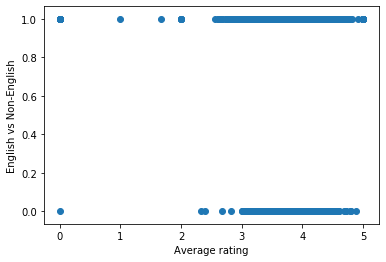

In [84]:
#plotting 

#goal is to see if english books are more highly rated than non english movies
plt.scatter(train['average_rating'], train['eng'])
plt.ylabel('English vs Non-English')
plt.xlabel('Average rating')

In [85]:
#reshaping feature vectors for fitting intto regression model
x_train = train['average_rating'].values.reshape(-1,1)
y_train = train['eng'].values.reshape(-1,1)


#fitting model
logreg.fit(x_train, y_train)

/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/opt/anaconda3/lib/python3.7/site-packages/sklearn/utils/validation.py:724: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='warn', n_jobs=None, penalty='l2',
                   random_state=None, solver='warn', tol=0.0001, verbose=0,
                   warm_start=False)

### TODO 3: Compute Accuracy of Your Model

1. Make __Predictions__ based on model.
2. Compute the __Accuracy__ of model.

In [86]:
#predictions
logreg.predict_proba(x_train)

array([[0.19795964, 0.80204036],
       [0.19802976, 0.80197024],
       [0.19796841, 0.80203159],
       ...,
       [0.19849475, 0.80150525],
       [0.19870559, 0.80129441],
       [0.19853866, 0.80146134]])

 ^^^For lower review numbers there is between a 19.5%-19.6% probability of a book being in english.
For higher reviews, there is around a 80.4% probabilty that a book will be in english.

Therefore we can assume that English books do have higher average reviews than Non-English Books

In [87]:
#Accuracy score
logreg.score(x_train,y_train)

0.8016380567710086

# Task 3: Recommendation System

Goal is to build model that takes in a book and recommends similar books. Will be using training set only

### TODO 1: Format Data

In [88]:
#pivoting table
average_rating = train.pivot_table(index='bookID', columns='title', values='average_rating')
#replacing NaN values with 0
average_rating = average_rating.replace(np.nan, 0)

average_rating.head()

title,said the shotgun to the head.,'Salem's Lot,1 000 Places to See Before You Die,10 lb Penalty,100 Great Fantasy Short Short Stories,100 Love Sonnets,100 Years of Lynchings,1000 Rings: Inspiring Adornments for the Hand,1001 Illuminated Initial Letters: 27 Full-Color Plates,101 Stories of the Great Ballets: The Scene-by-Scene Stories of the Most Popular Ballets Old and New,...,鋼の錬金術師 3 (Fullmetal Alchemist #3),鋼の錬金術師 5 (Fullmetal Alchemist #5),鋼之鍊金術師 1,鋼之鍊金術師 10,鋼之鍊金術師 2,鋼之鍊金術師 4,鋼之鍊金術師 5,鋼之鍊金術師 6,鋼之鍊金術師 7,魔戒二部曲：雙城奇謀
bookID,,,,,,,,,,,,,,,,,,,,,
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
5,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
8,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
9,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [96]:
#decomposing the matrix
X = average_rating.T
X.head()

bookID,1,2,5,8,9,12,13,14,16,18,...,45616,45617,45623,45625,45626,45630,45633,45634,45639,45641
title,,,,,,,,,,,,,,,,,,,,,
said the shotgun to the head.,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
'Salem's Lot,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1 000 Places to See Before You Die,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
10 lb Penalty,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
100 Great Fantasy Short Short Stories,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [97]:
#Decomposing the Matrix
from sklearn.decomposition import TruncatedSVD
SVD = TruncatedSVD(n_components=10)
decomposed_matrix = SVD.fit_transform(X)
decomposed_matrix.shape

(8384, 10)

In [98]:
#Correlation Matrix
correlation_matrix = np.corrcoef(decomposed_matrix)
correlation_matrix.shape

/opt/anaconda3/lib/python3.7/site-packages/numpy/lib/function_base.py:2534: RuntimeWarning: invalid value encountered in true_divide
  c /= stddev[:, None]
/opt/anaconda3/lib/python3.7/site-packages/numpy/lib/function_base.py:2535: RuntimeWarning: divide by zero encountered in true_divide
  c /= stddev[None, :]
/opt/anaconda3/lib/python3.7/site-packages/numpy/lib/function_base.py:2535: RuntimeWarning: invalid value encountered in true_divide
  c /= stddev[None, :]


(8384, 8384)

In [108]:
#example of book title
X.index[180]

'A Modern Utopia'

### TODO 2: Define Recommendation Function

In [154]:
def rec(book):
    book_names = list(X.index)
    book_ID = book_names.index(book)
    correlation_book_ID = correlation_matrix[book_ID]
    
    #returns items with correlation greater than 0.85
    Recommend = list(X.index[correlation_book_ID > 0.85])
    # Removes book that we want recommendations from
    Recommend.remove(book) 
    
    return Recommend

### TODO 3: Test Recommender Function

In [155]:
#should return history books
rec('The Last Days of Henry VIII')

/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:7: RuntimeWarning: invalid value encountered in greater
  import sys


['11 de Septiembre',
 "3rd Degree (Women's Murder Club  #3)",
 'A Conflict of Visions: Ideological Origins of Political Struggles',
 'A Near Thing for Captain Najork (Captain Najork #2)',
 'A Pale View of Hills',
 'A Practical Guide to Dragons',
 'A Star Called Henry',
 'A Walk in the Woods: Rediscovering America on the Appalachian Trail',
 'Algorithms in C  Parts 1-4: Fundamentals  Data Structures  Sorting  Searching',
 'Ali and Nino',
 'Aman: The Story of a Somali Girl',
 'American Splendor: Another Day',
 'Analects',
 'At the Mountains of Madness and Other Novels',
 'Atlantis Found (Dirk Pitt  #15)',
 'Auszeit für Engel Walsh Family  #3)',
 'Because I Remember Terror  Father  I Remember You',
 "Bedlam's Bard (Bedlam Bard  #1-2)",
 'Bevor es Nacht wird. Ein Leben in Havanna',
 'Black Like Me',
 "Bridget Jones's Guide to Life",
 'Castle Diary: The Journal of Tobias Burgess',
 'Cause of Death (Kay Scarpetta  #7)',
 'Changing Planes',
 'Checkpoint',
 'Clarissa  Or The History of a Young